In [1]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [57]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


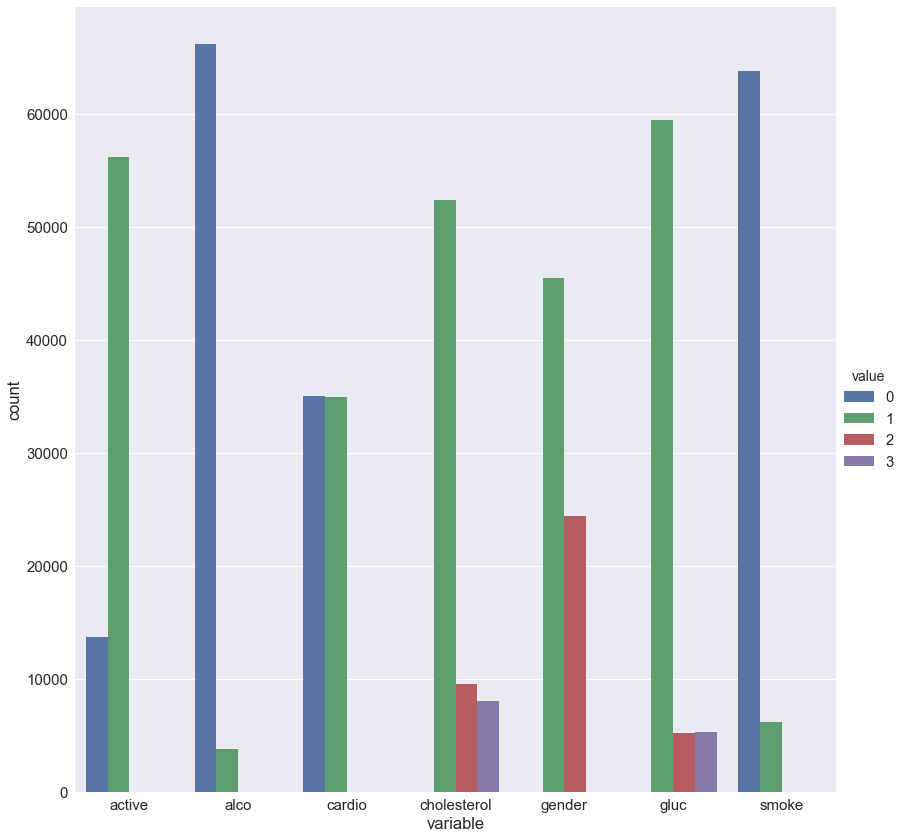

In [4]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

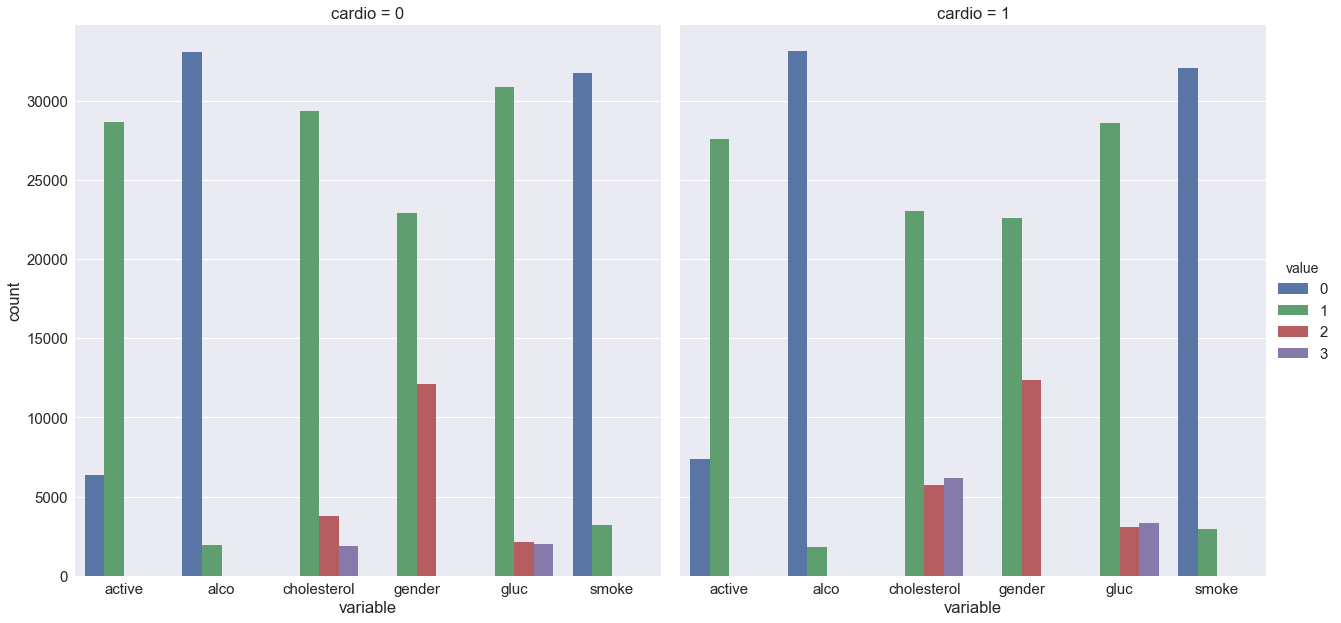

In [5]:
# Можно также разбить элементы обучающей выборки по значениям целевой переменной: 
# иногда на таких графиках можно сразу увидеть самый значимый признак.

df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);
# Видим, что в зависимости от целевой переменной сильно меняется распределение холестерина и глюкозы. Совпадение?

In [6]:
# Немного статистики по уникальным значениям признаков.

for c in df.columns:
    n = df[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [ ]:
# если что-то заметил - не забывать что мелтаган опасное оружие в руках любого лоялиста и лучше сбегай в варп 
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

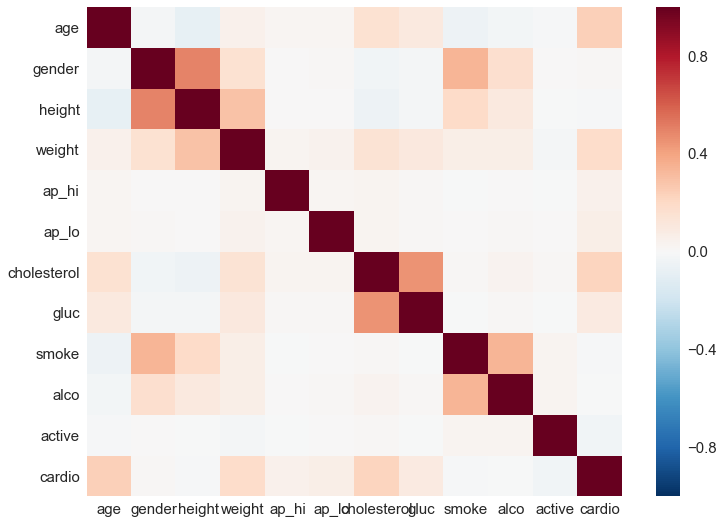

In [57]:
correlation = df.corr('pearson')
sns.heatmap(correlation)

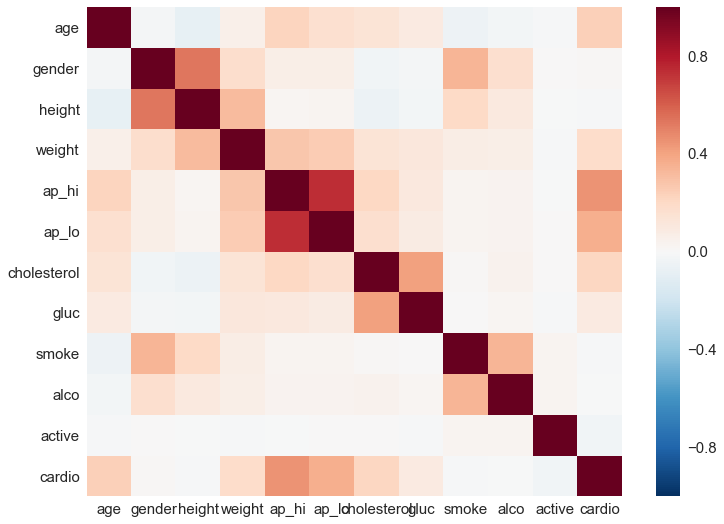

In [58]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix)

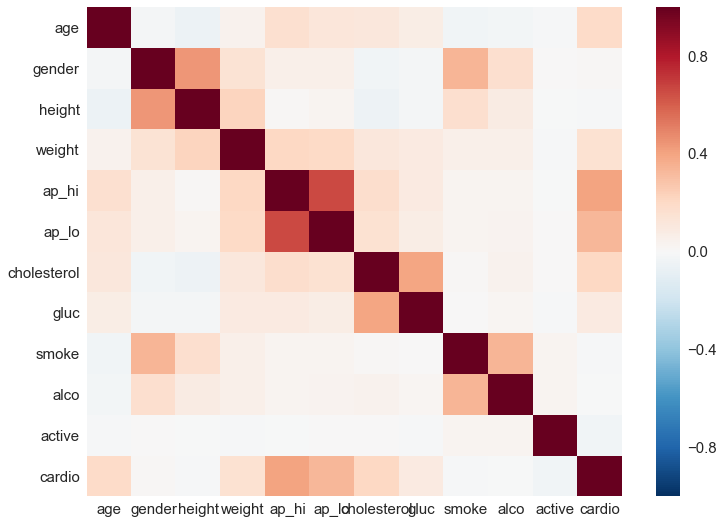

In [14]:
# няша, даже ересь хаоса в твоей голове сильна и ты сидишь в обнимку с градускником и при температуре в 39 пытаешься кодить
# смотри внмиательно на разницу в графиках ибо это не спроста. Можно: df.corr(pearson’, ‘kendall’, ‘spearman’)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
corr_matrix = df.corr('kendall')
sns.heatmap(corr_matrix)

In [34]:
# посмотрим на числа.
# функция возвращает к.к. Пирсона и p-value 
# проверяется гипотеза о том, что такое значение к.к. Пирсона получено случайно
from scipy.stats import pearsonr
age = df['age']
gender = df['gender']
r,p = pearsonr(age, gender)
r,p

(-0.022810651720422629, 1.5816857688530261e-09)

In [ ]:
# Коэффициент корреляции Пирсона 
# это мера скоррелированности двух переменных.
# Он принимает значения от 1 до –1, где 1 означает, что корреляция между переменными идеальна,
# 0 – что корреляции нет, а –1 – что имеется идеальная обратная корреляция, а Корреляция по Спирману "ранговая". 

In [59]:
age = df['age']
age1 = df['age']
r,p = pearsonr(age, age1)
r,p

(1.0, 0.0)

In [60]:
# Какие два признака больше всего коррелируют (по Пирсону) с признаком gender ?
# Cardio, Cholesterol
# Height, Smoke
# Smoke, Alco
# Height, Weight
# но, поскольку pearsonr() takes 2 positional arguments but 3 were given - придёться сравнивать по парно с gender

gender= df["gender"]
cardio = df["cardio"]
r,p = pearsonr(gender, cardio)
r,p

(0.0081094919131222565, 0.031907552772694275)

In [26]:
gender= df["gender"]
cholesterol = df["cholesterol"]
r,p = pearsonr(gender, cholesterol)
r,p

(-0.035821412777064222, 2.5348475767502665e-21)

In [29]:
gender= df["gender"]
height = df["height"]
r,p = pearsonr(gender, height)
r,p

(0.49903342844224097, 0.0)

In [30]:
gender= df["gender"]
smoke = df['smoke']
r,p = pearsonr(gender, smoke)
r,p

(0.33813513635809389, 0.0)

In [31]:
gender= df["gender"]
alco = df['alco']
r,p = pearsonr(gender, alco)
r,p

(0.17096642854779004, 0.0)

In [35]:
gender= df["gender"]
weight = df['weight']
r,p = pearsonr(gender, weight)
r,p

(0.15540564009000196, 0.0)

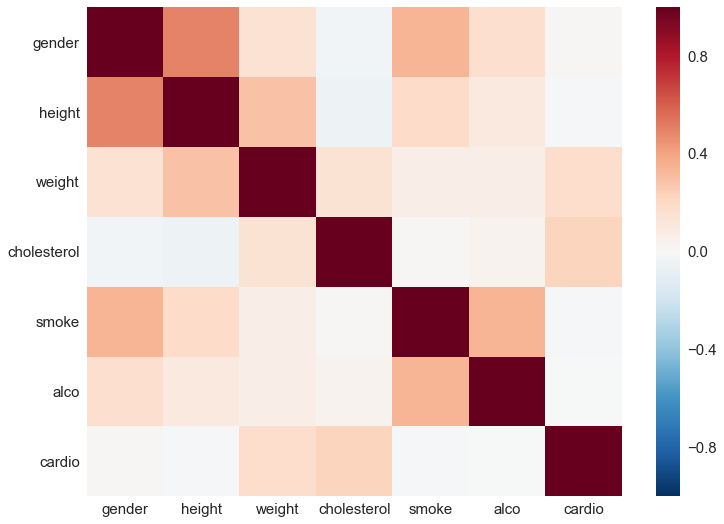

In [45]:
corr_matrix = df.drop(['age', 'ap_hi', 'ap_lo', 'active', 'gluc' ], axis=1).corr()
sns.heatmap(corr_matrix);

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [ ]:
# я подозреваю что по Пирсону с gender больше всего коррелируют height (0.49903342844224097) и Weight (0.15540564009000196)
# и подозреваю неправильно, потому что а) болею и б) по Персиону 0 - это отсутствие корреляции
# поэтому правильный ответ:  height (0.49903342844224097) и smoke (0.33813513635809389)

In [46]:
df['gender'].value_counts()  

1    45530
2    24470
Name: gender, dtype: int64

In [47]:
# второй False - сортировка по убыванию роста
# первый False - сортировка по полу(2)
df.sort_values(by=['gender', 'height'],ascending=[False, False]).head()    

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
30894,19054,2,207,78.0,100,70,1,1,0,1,1,0
59847,19187,2,200,100.0,170,1100,2,2,0,0,1,1
1554,22156,2,198,68.0,120,80,1,1,0,0,1,1
4561,16072,2,198,61.0,110,70,1,1,0,0,1,1
12687,22497,2,198,79.0,160,100,1,1,1,0,0,1


In [48]:
# второй False - сортировка по убыванию роста
# первый True - сортировка по полу(1)
df.sort_values(by=['gender', 'height'],ascending=[True, False]).head()
# вывод - (1) == мужчины, (2) == женщины
# а вот и нет - давай посмотрим на средние значения.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9223,21220,1,250,86.0,140,100,3,1,0,0,1,1
43083,23274,1,198,85.0,110,90,1,1,0,0,1,0
43248,20381,1,198,89.0,120,80,1,1,0,0,1,0
57307,21201,1,198,99.0,140,80,1,1,0,0,1,1
71657,16671,1,198,75.0,170,100,2,1,0,1,1,1


In [49]:
df[df['gender'] == 1].mean() 

age            19510.124577
gender             1.000000
height           161.355612
weight            72.565605
ap_hi            128.139249
ap_lo             94.522776
cholesterol        1.384735
gluc               1.235054
smoke              0.017856
alco               0.025500
active             0.802021
cardio             0.496727
dtype: float64

In [50]:
df[df['gender'] == 2].mean() 

age            19392.097875
gender             2.000000
height           169.947895
weight            77.257307
ap_hi            130.078872
ap_lo            100.551982
cholesterol        1.333633
gluc               1.210462
smoke              0.218880
alco               0.106375
active             0.806906
cardio             0.505231
dtype: float64

In [51]:
# вывод - (1) == женщины, (2) == мужчины

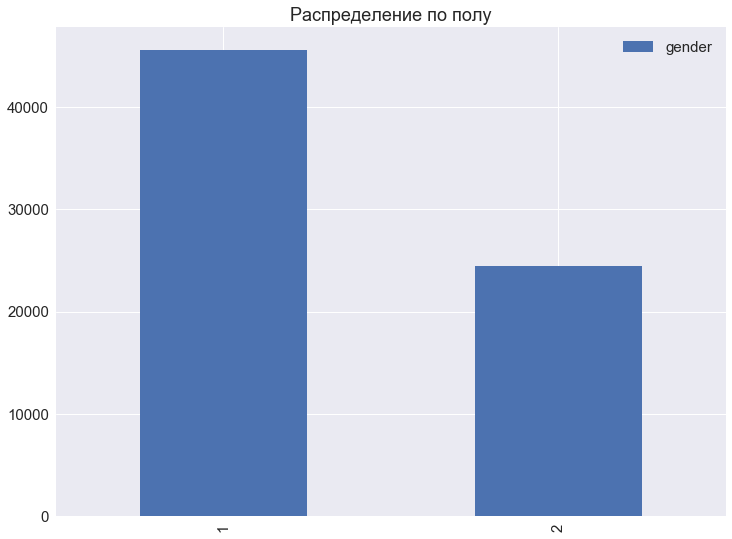

In [61]:
df['gender'].value_counts().plot(kind='bar', label='gender')
plt.legend()
plt.title('Распределение по полу');

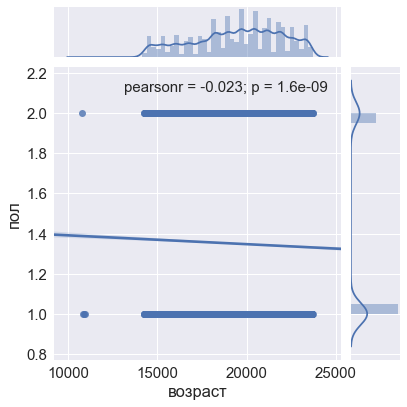

In [53]:
sns.jointplot(x='age', y='gender', data=df, kind='reg');
# подпишем оси координат
plt.xlabel("возраст");
plt.ylabel("пол");
plt.show();

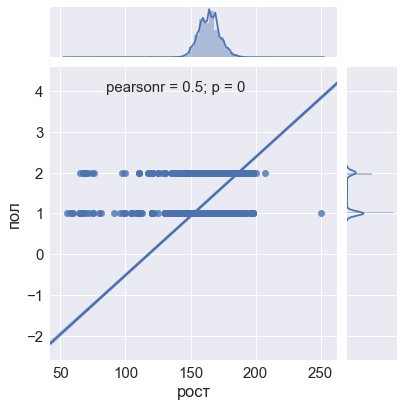

In [4]:
sns.jointplot(x='height', y='gender', data=df, kind='reg');
# подпишем оси координат
plt.xlabel("рост");
plt.ylabel("пол");
plt.show();

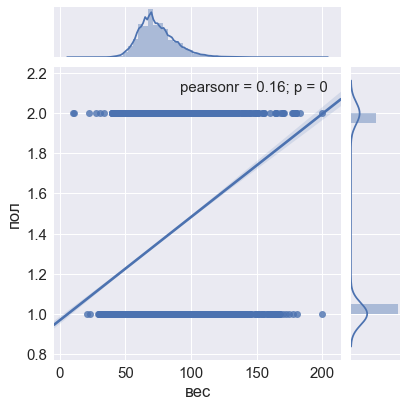

In [55]:
sns.jointplot(x='weight', y='gender', data=df, kind='reg');
# подпишем оси координат
plt.xlabel("вес");
plt.ylabel("пол");
plt.show();

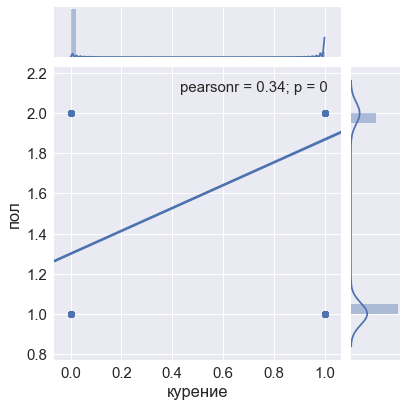

In [5]:
sns.jointplot(x='smoke', y='gender', data=df, kind='reg');
# подпишем оси координат
plt.xlabel("курение");
plt.ylabel("пол");
plt.show();

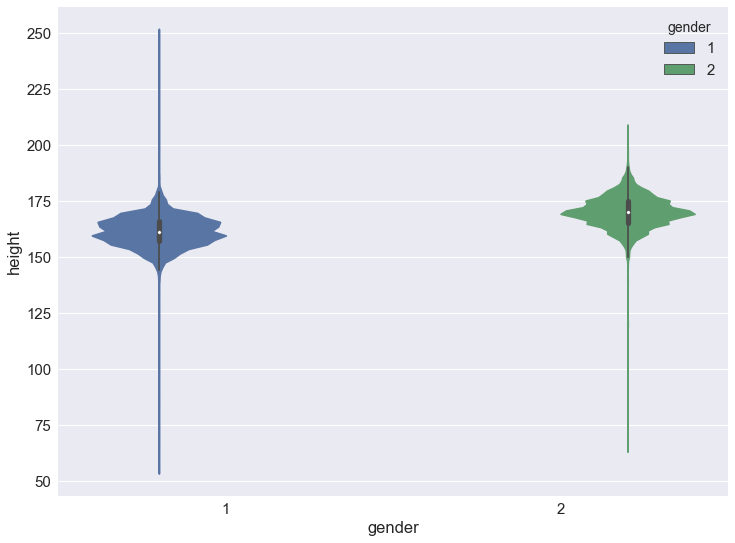

In [62]:
sns.violinplot(x='gender', y='height', hue = 'gender', scale='count', data=df)

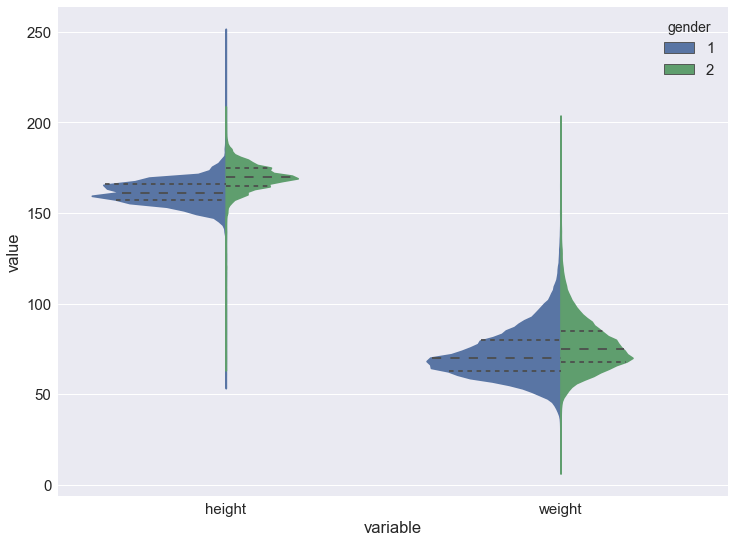

In [63]:
df = pd.melt(df, value_vars=['height', 'weight'], id_vars='gender')
sns.violinplot(x='variable', hue='gender', y='value', data = df, scale = "count", split=True, inner="quartile")

In [86]:
# если что-то заметил - не забывать что мелтаган опасное оружие в руках любого лоялиста и лучше сбегай в варп 
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


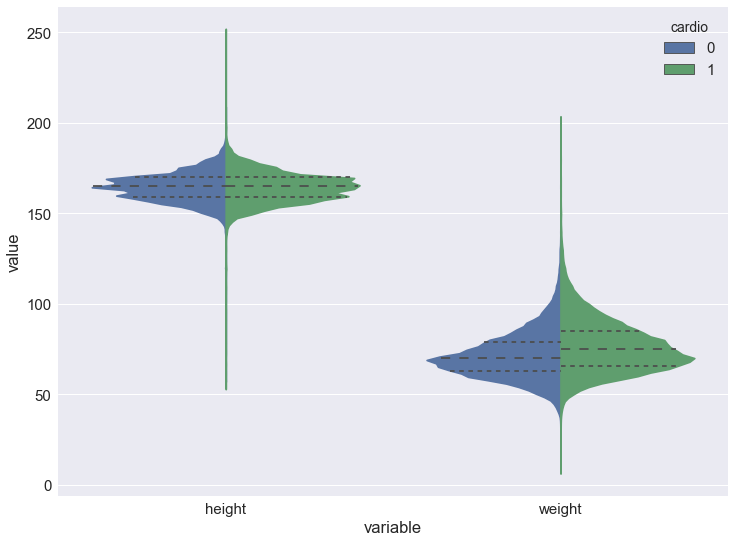

In [87]:
df = pd.melt(df, value_vars=['height', 'weight'], id_vars='cardio')
sns.violinplot(x='variable', hue='cardio', y='value', data = df, scale = "count", split=True, inner="quartile")

In [90]:
# если что-то заметил - не забывать что мелтаган опасное оружие в руках любого лоялиста и лучше сбегай в варп 
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


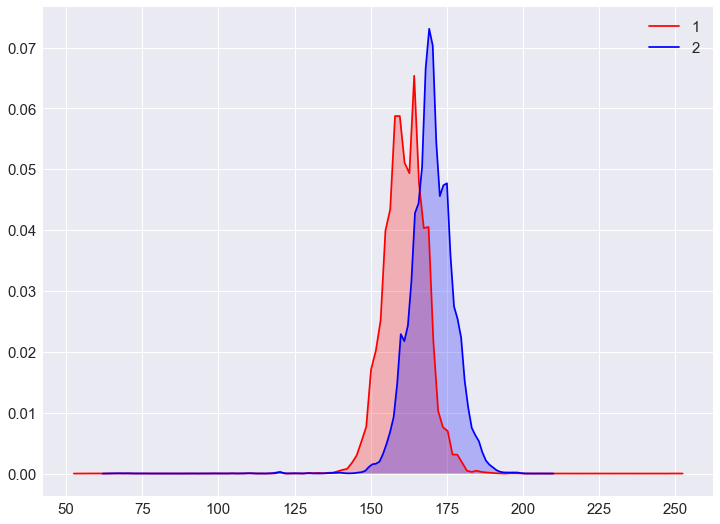

In [91]:
sns.kdeplot(df['height'][df.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['height'][df.gender==2], shade=True, color="b", label='2')

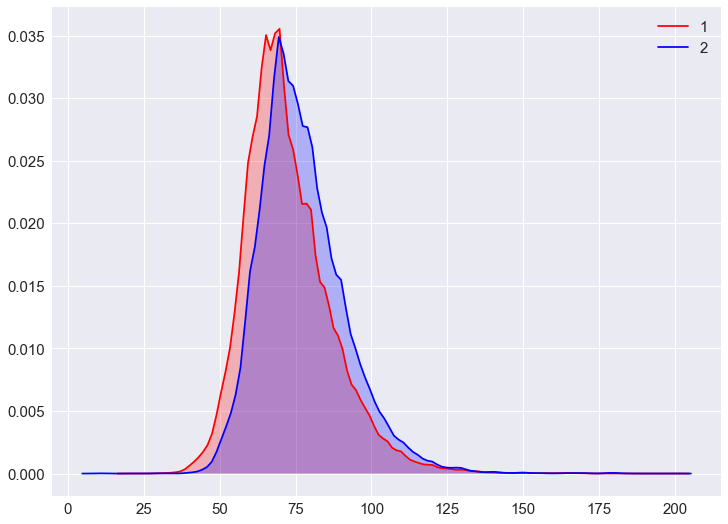

In [92]:
sns.kdeplot(df['weight'][df.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['weight'][df.gender==2], shade=True, color="b", label='2')

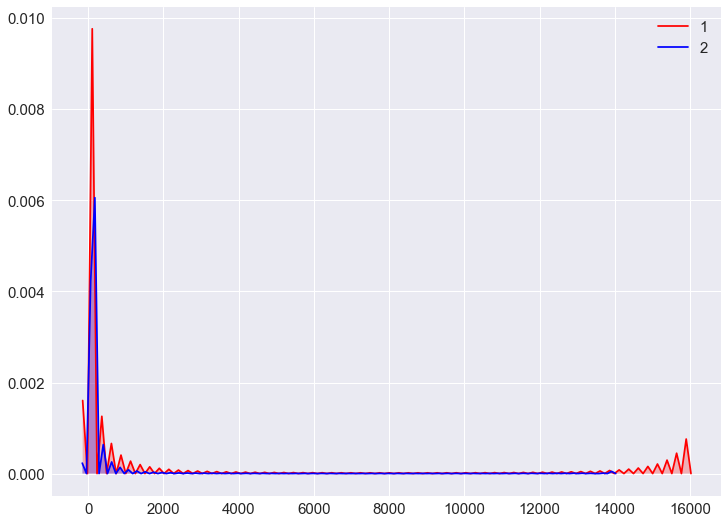

In [93]:
sns.kdeplot(df['ap_hi'][df.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['ap_hi'][df.gender==2], shade=True, color="b", label='2')

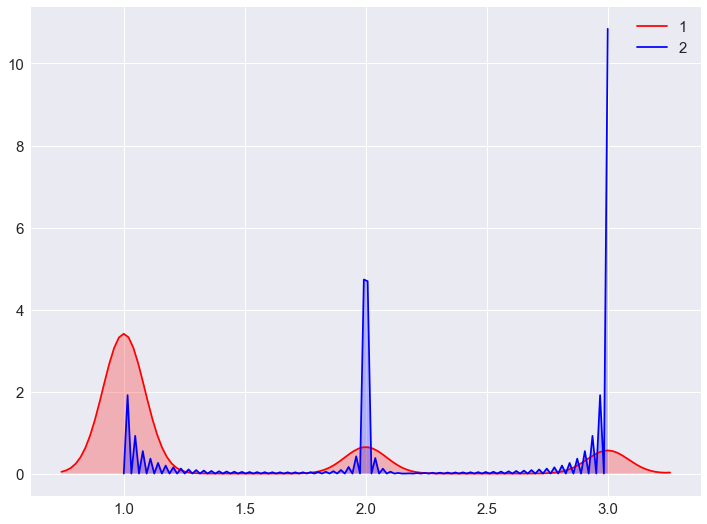

In [94]:
sns.kdeplot(df['cholesterol'][df.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['cholesterol'][df.gender==2], shade=True, color="b", label='2')

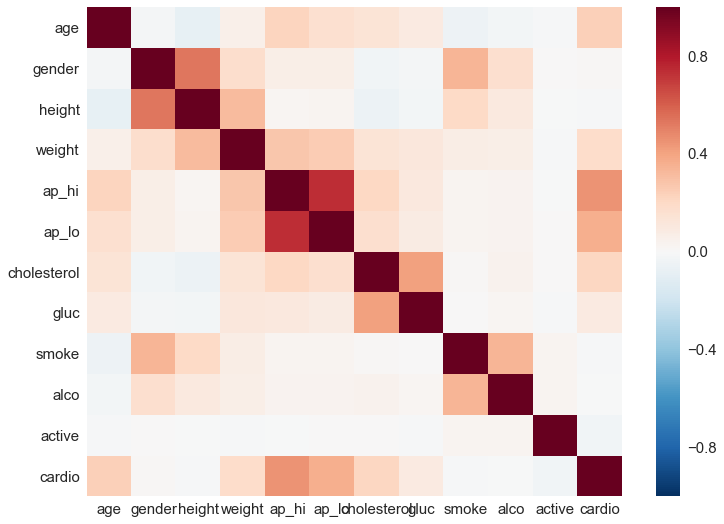

In [95]:
corr_spearman = df.corr('spearman')
sns.heatmap(corr_spearman)
#help(corr)

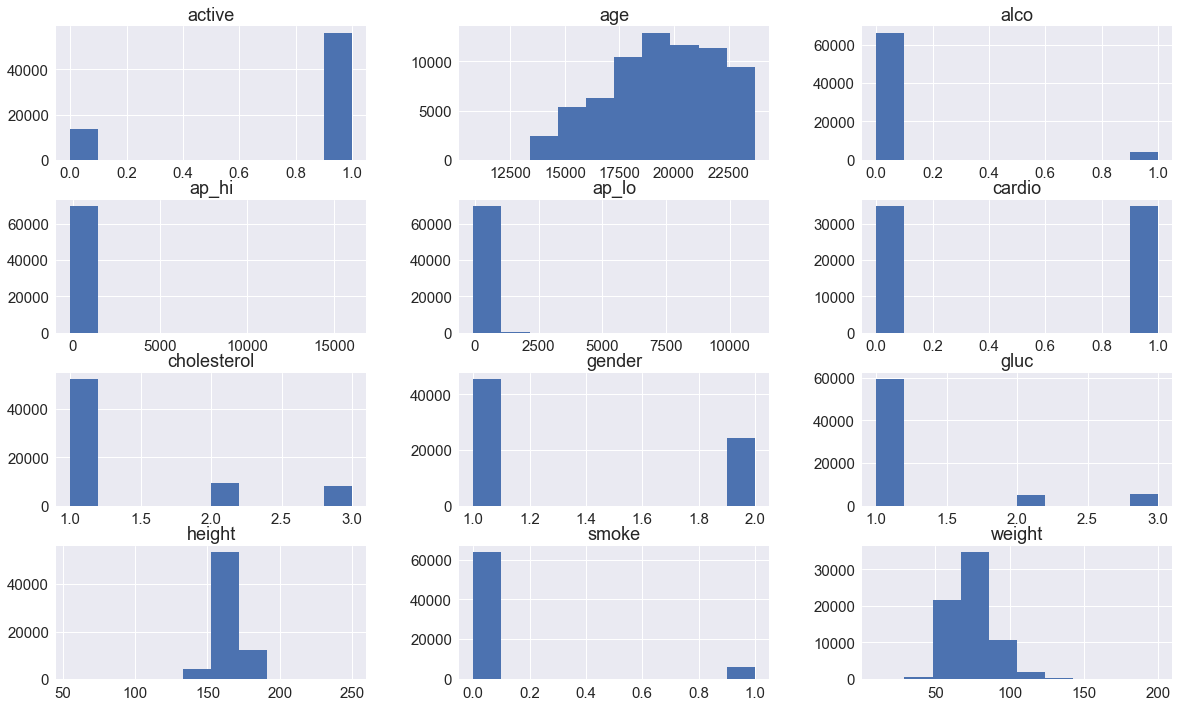

In [6]:
features = df.columns
df[features].hist(figsize=(20,12));

In [ ]:
## Отфильтруем ошибочные данные

In [102]:
df = df[df['ap_lo'] <= df['ap_hi']]
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9179827240205916


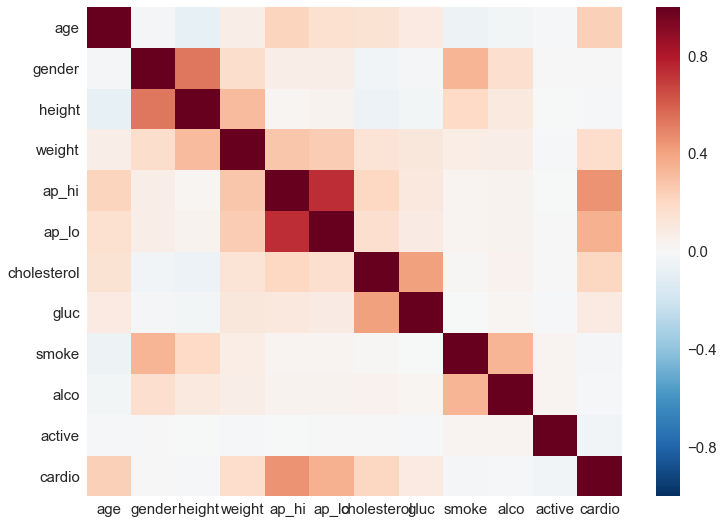

In [103]:
corr_df_spearman = df.corr('spearman')
sns.heatmap(corr_df_spearman)

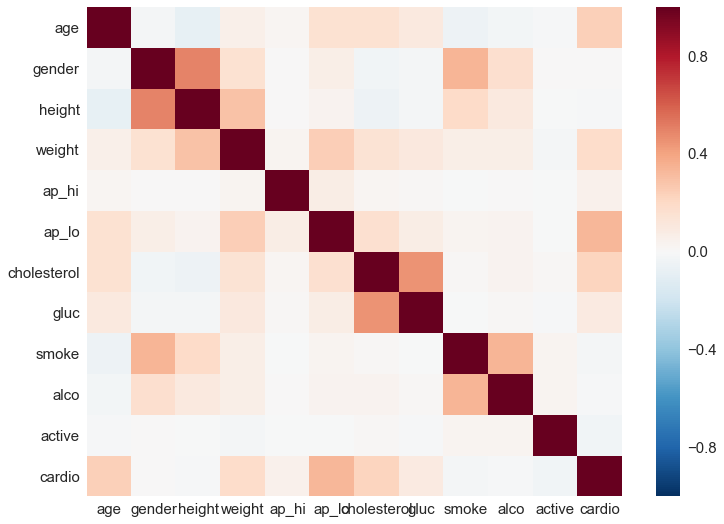

In [105]:
correlation = df.corr('pearson')
sns.heatmap(correlation)

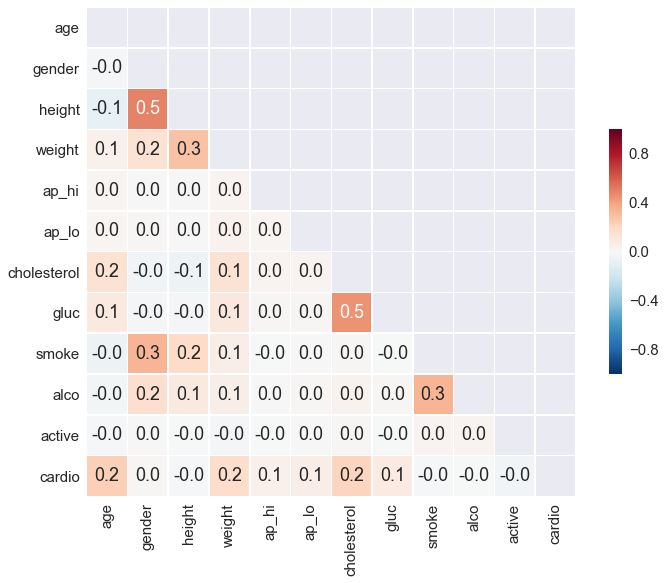

In [3]:
# а теперь посмотрим на более продвинутый вариант от ml_open
# Вычисляем матрицу корреляций
corr = df.corr(method='pearson')

# Генерируем маску для отсечения верхней диагонали матрицы
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});    

In [ ]:
# да, на такой матрице видно всяко лучше чем на моей, зато я смог посчитать корреляцию Пирсона кодом и не ошибся в этом.

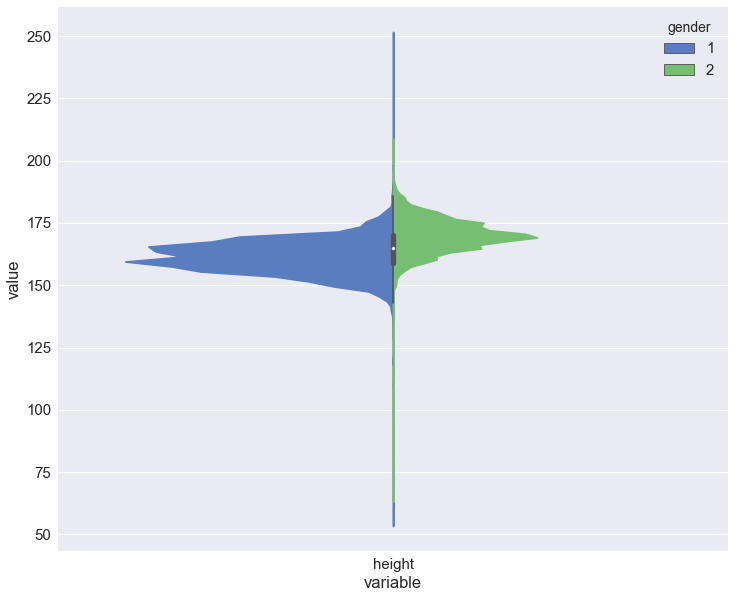

In [7]:
# кроме того ML_open иначе, чем я, построили график распределения роста по полу
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

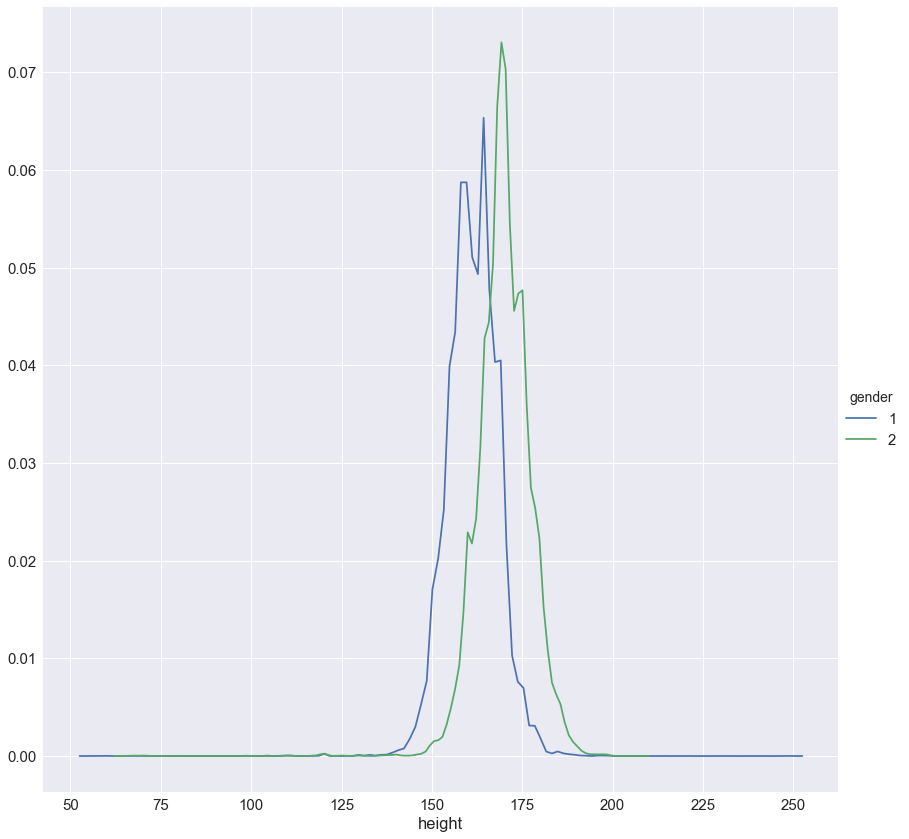

In [9]:
# и иначе построили двойной kdeplot
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();

In [19]:
# если что-то заметил - не забывать что мелтаган опасное оружие в руках любого лоялиста и лучше сбегай в варп 
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


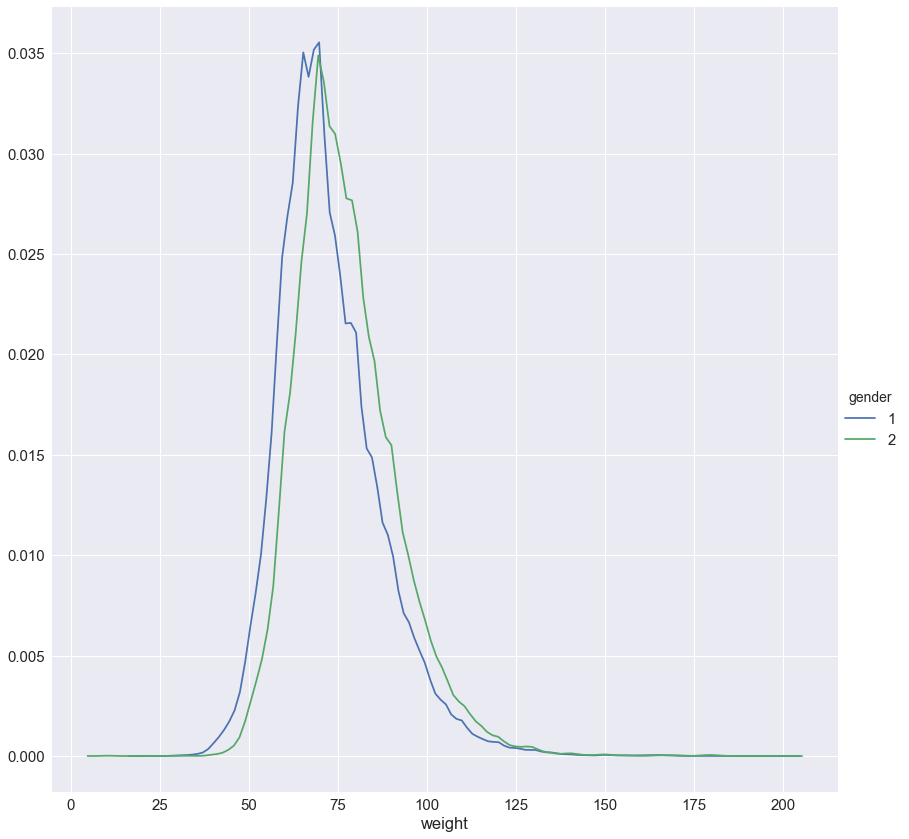

In [11]:
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "weight").add_legend();

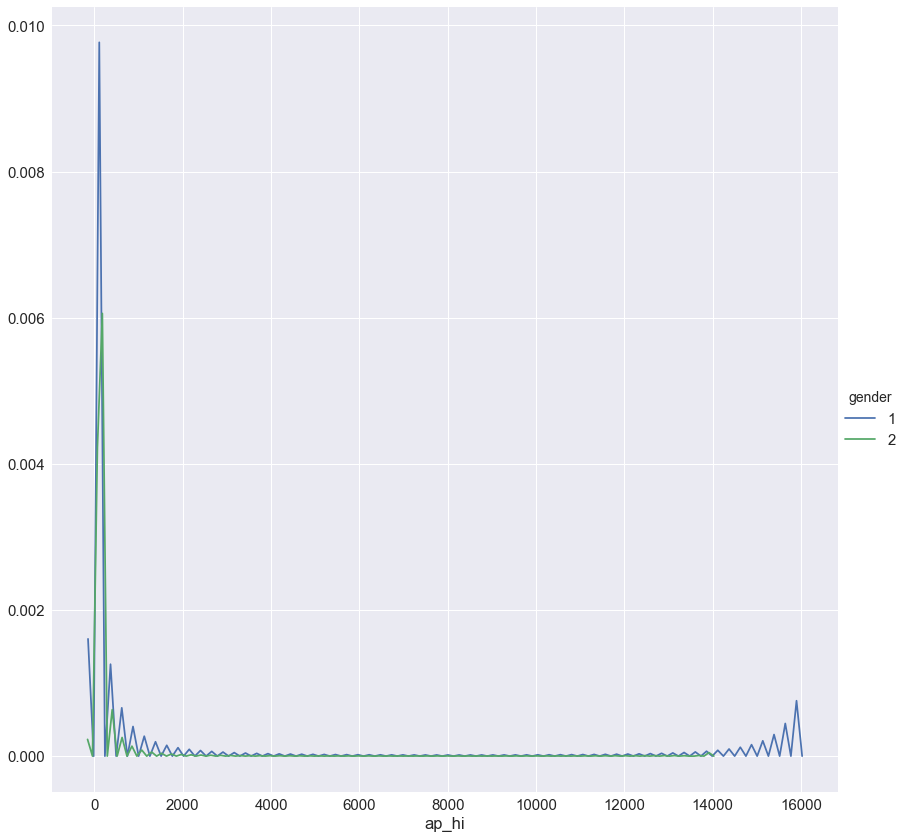

In [13]:
# для некоторый признаков подходит плохо
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "ap_hi").add_legend();

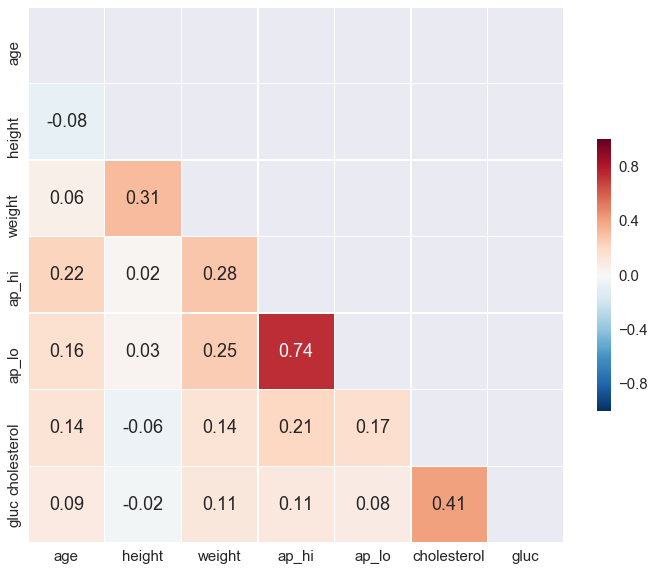

In [15]:
# график корреляция по Спирману
corr = df[['age', 'height', 'weight', 
              'ap_hi', 'ap_lo', 'cholesterol', 
              'gluc']].corr(method='spearman')

# Маска для закрытия верхнего треугольника матрицы корреляций (матрица симметрична)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [21]:
# вычисление корреляции по Спирману
from scipy.stats import spearmanr
age = df['age']
gender = df['gender']
r,p = spearmanr(age, gender)
r,p

(-0.020176419203339156, 9.3653187513486436e-08)

In [28]:
ap_hi = df['ap_hi']
ap_lo = df['ap_lo']
r,p = spearmanr(ap_hi, ap_lo)
r,p

(0.73543610513797764, 0.0)

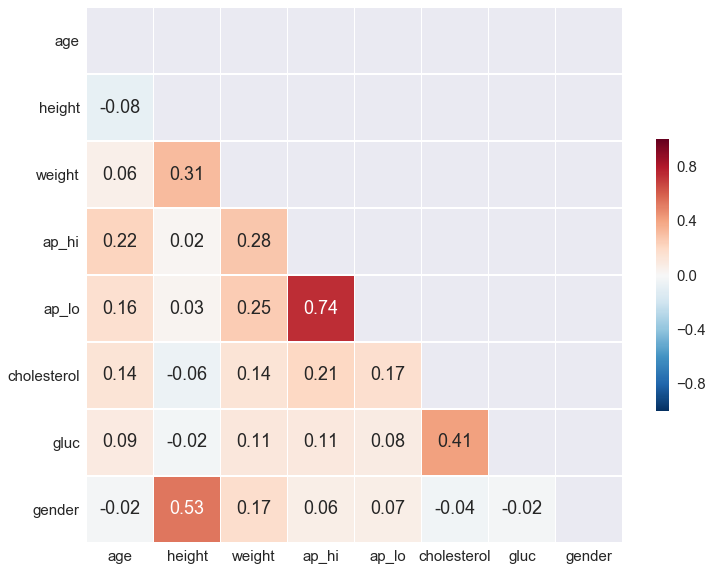

In [24]:
#ещё одна корреляция по Спирману
corr = df[['age', 'height', 'weight', 
              'ap_hi', 'ap_lo', 'cholesterol', 
              'gluc','gender']].corr(method='spearman')

# Маска для закрытия верхнего треугольника матрицы корреляций (матрица симметрична)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [26]:
age = df['ap_lo']
gender = df['ap_hi']
r,p = spearmanr(gender,age)
r,p

(0.73543610513797764, 0.0)

In [29]:
ap_lo = df['ap_lo']
gender = df['gender']
r,p = spearmanr(ap_lo, gender)
r,p

(0.066374071050326111, 3.5056290491329207e-69)

In [30]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [31]:
df.corr(method='spearman')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429
gender,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109
height,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383
weight,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701
ap_hi,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885
ap_lo,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572
cholesterol,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117
gluc,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488
smoke,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486
alco,-0.030078,0.170966,0.096670,0.068088,0.033243,0.038862,0.041285,0.018584,0.340094,1.000000,0.025476,-0.007330


In [ ]:
# смотри кстати что умеет делать pandas https://pandas.pydata.org/pandas-docs/stable/computation.html

In [ ]:
# Общий смысл корреляции Спирмана просто ак тюбик с пастой:
# есть пары признаков, в которых меньший ранг из вариационного ряда одного признака
# всегда предшествует большему другого (или наоборот, в случае отрицательной корреляции).
# первая пара ранговой корреляции: [ap_hi ap_lo] , вторая - [gender height], третья [gluc cholesteron]

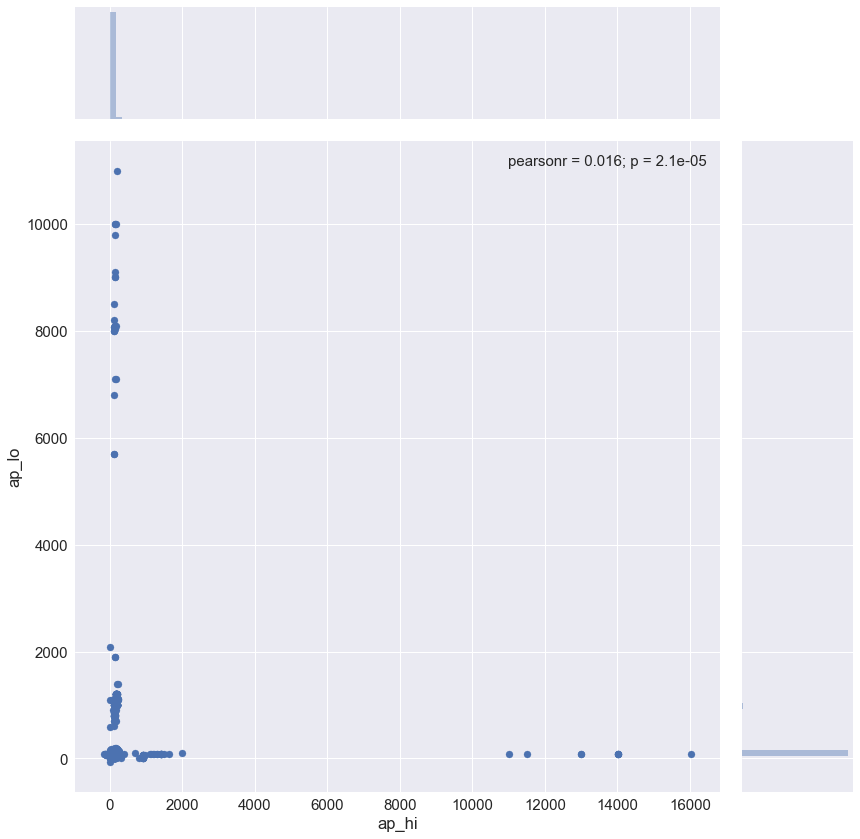

In [36]:
# Постройте совместный график распределения jointplot двух наиболее коррелирующих между собой признаков (по Спирмену)
sns.jointplot(df['ap_hi'], df['ap_lo'], size=12, marginal_kws=dict(bins=100, rug=False));

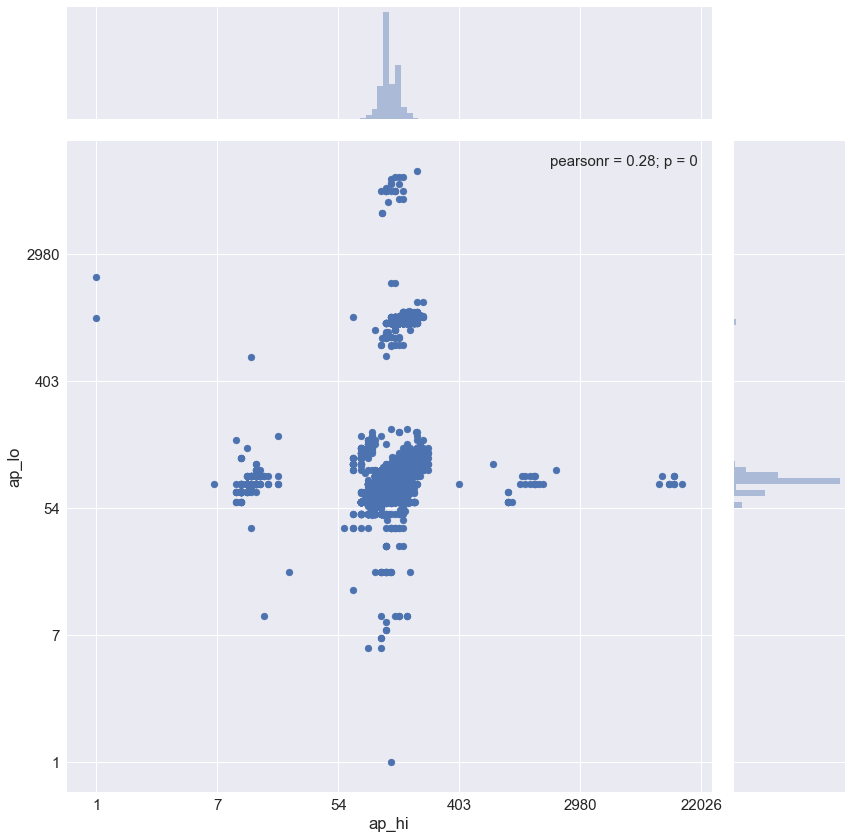

In [43]:
# графики получиль неинформативным из-за выбросов в значениях. Построем те же графики но с логарифмической шкалой

tmp_df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)][['ap_lo', 'ap_hi']].apply(np.log)
g = sns.jointplot(tmp_df['ap_hi'], tmp_df['ap_lo'], size= 12, marginal_kws=dict(bins=100, rug=False))
# -------------------- #

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

In [ ]:
# Сколько четко выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой?
# == больше 3х кластеров. 

In [59]:
# Посчитаем, сколько полных лет было респондентам на момент их занесения в базу.
df['age_years'] = (df['age'] // 365.25).astype(int) 

In [61]:
df['age_years'].head()

id
0    50
1    55
2    51
3    48
4    47
Name: age_years, dtype: int32

In [54]:
df['age_years'].mean()

52.80325714285714

In [62]:
# Постройте Countplot, где на оси абсцисс будет отмечен возраст, на оси ординат – количество.
# Каждое значение возраста должно иметь два столбца, соответствующих количеству человек каждого класса cardio данного возраста.

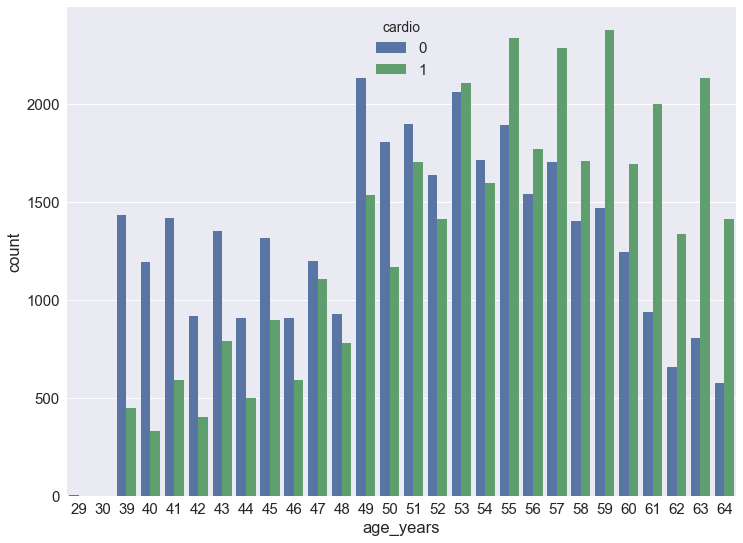

In [65]:
sns.countplot(x="age_years", hue='cardio', data=df);

In [ ]:
#  В каком возрасте количество пациентов с ССЗ впервые становится больше, чем здоровых?
#  в возрасте 53 лет обладателей кардиостимуляторов становиться больше чем здоровых людей.

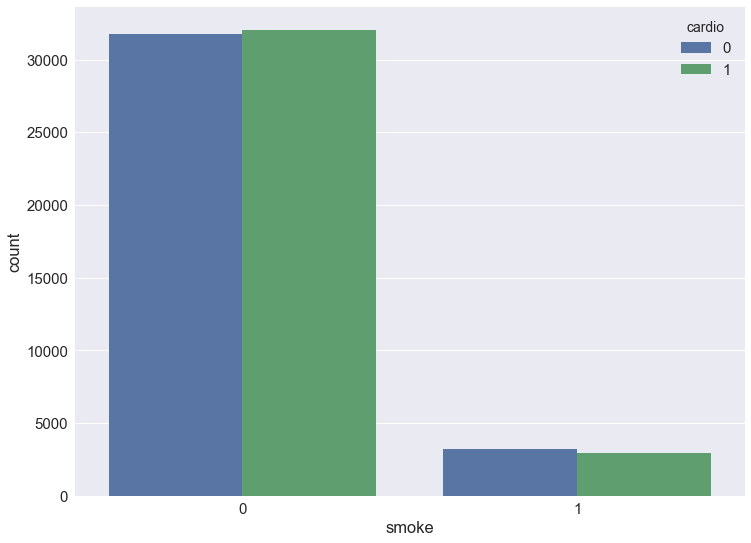

In [68]:
sns.countplot(x="smoke", hue='cardio', data=df);

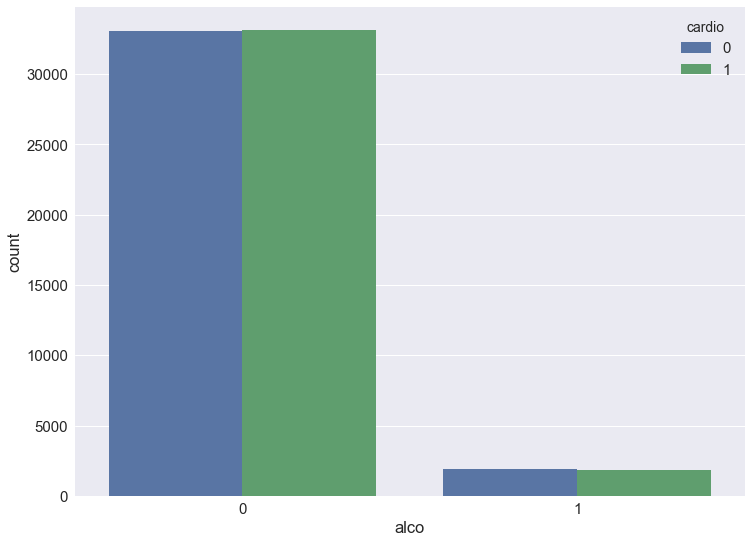

In [69]:
sns.countplot(x="alco", hue='cardio', data=df);

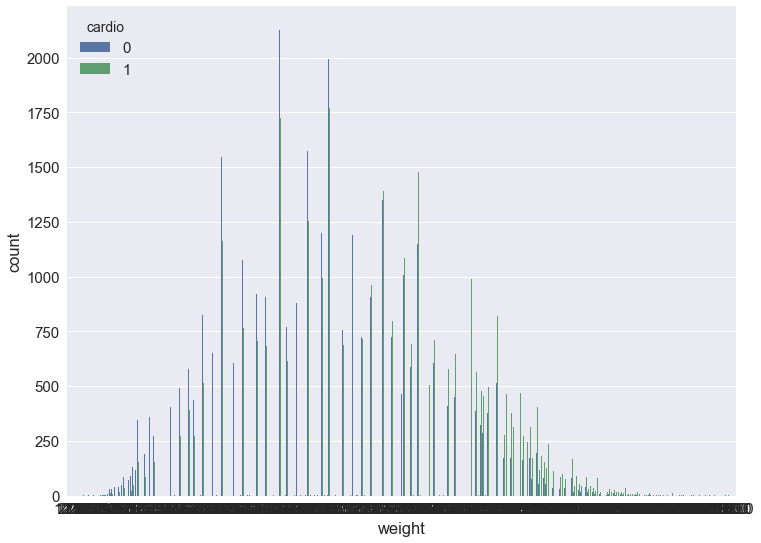

In [71]:
sns.countplot(x="weight", hue='cardio', data=df);

In [ ]:
# коечно, можно поделить вес на число юезров и вообще обмазаться маетиматикой, но у меня температура и грипп. я устал и сплю.